In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('GRTests.pickle', 'rb')
data = pickle.load(f)

In [2]:
print(data['var'])
print()
print(data['order'])
print()
for key in data['data'][list(data['data'].keys())[0]][0].keys():
    print(key)

{'reclusterThreshold': [0.01, 0.025, 0.05, 0.1], 'globalRecluster': [0, 1], 'GRDecrement': [0.7, 0.75], 'localRecluster': [0, 2], 'GRIncrement': [1.5, 2], 'smallImprovement': [0.1, 0.2, 0.3]}

['localRecluster', 'GRDecrement', 'globalRecluster', 'smallImprovement', 'reclusterThreshold', 'GRIncrement']

Local Reclusters
Detection Time
Alive valid nodes
# False Negatives Drift
# False Positive = Confirmations
# Total False Positives
Max Battery
Recluster period
Wifi
# Total False Negatives
# True Positive = Rejections
# False Positive Drift
Global reclusters
Number of clusters
Samples
Percent Alive
# True Positive Rejections
# False Positive Confirmations
Min Battery
Lost readings
Cluster searches
# False Positive Wind
config
Recluster threshold
# False Negatives
Average Battery
Distances
CS Solos
BTReadings
# False Positives
Potential global reclusters
Bluetooth
BTClusterSearch
Clusters above thresh
Clusters below thresh
True Positive Findings
# False Positive Rejections
CS Joins
Avg cl

In [3]:
i = 0
for key in data['data'].keys():
    i += len(data['data'][key])
print(i)

200


In [4]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            if key[ind] == ignoreDict[ind]:
                ignore = True
        if not ignore:
            for run in data['data'][key]:
                keyStrs = []
                for ind in keyInds:
                    keyStrs += [str(key[ind])]
                statsKey = '-'.join(keyStrs)
                arr = run[compare]
                minArrLen = min(minArrLen, len(arr))
                if statsKey in stats.keys():
                    for i in range(minArrLen):
                        stats[statsKey][i] += arr[i]
                    counts[statsKey] += 1
                else:
                    stats[statsKey] = []
                    for i in range(minArrLen):
                        stats[statsKey] += [arr[i]]
                    counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [5]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

In [111]:
NumGlobalReclusters = compareOverTime('Global reclusters', [4], {0:0, 2:0})

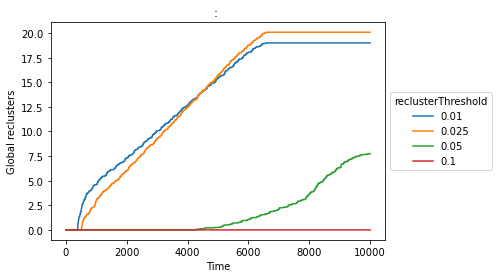

In [112]:
generateOverTimeGraphs(NumGlobalReclusters, 0)

In [113]:
ReclusterThresh = compareOverTime('Recluster threshold', [4], {0:0, 2:0})

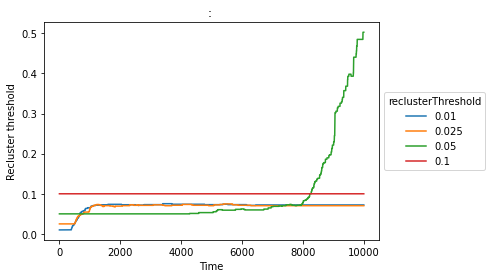

In [114]:
generateOverTimeGraphs(ReclusterThresh, separationLevel=0)

In [6]:
Alive = compareOverTime('Percent Alive', [2,4], {0:0})

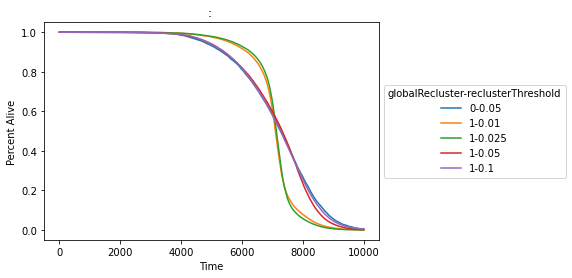

In [7]:
generateOverTimeGraphs(Alive, 0)

In [8]:
AvgBattery = compareOverTime('Average Battery', [2,4], {0:0})

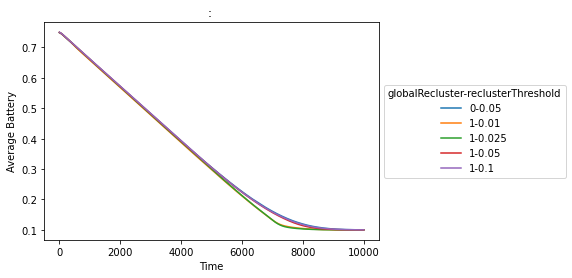

In [9]:
generateOverTimeGraphs(AvgBattery, 0)

In [99]:
Wifi = compareOverTime('Wifi', [2,4], {0:0})

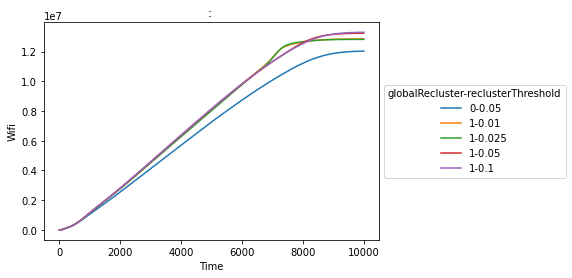

In [100]:
generateOverTimeGraphs(Wifi, 0)

In [101]:
clusterSize = compareOverTime('Avg cluster size', [2,4], {0:0})

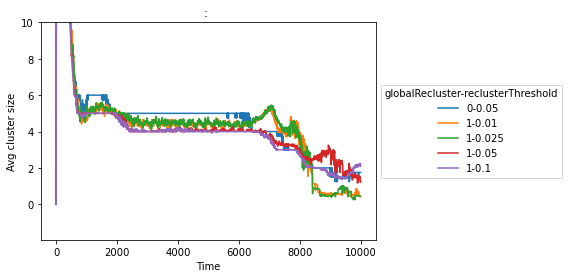

In [102]:
generateOverTimeGraphs(clusterSize, topY=10)

In [103]:
BTRecluster = compareOverTime('BTRecluster', [2,4], {0:0})

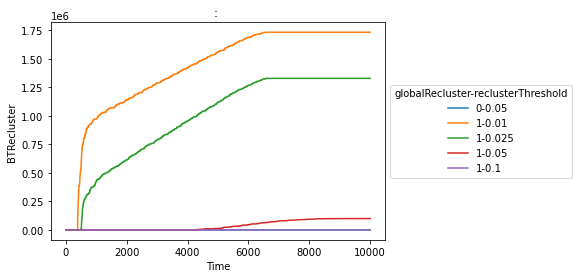

In [104]:
generateOverTimeGraphs(BTRecluster, separationLevel=0)

In [105]:
BTClusterSearch = compareOverTime('BTClusterSearch', [2,4], {0:0})

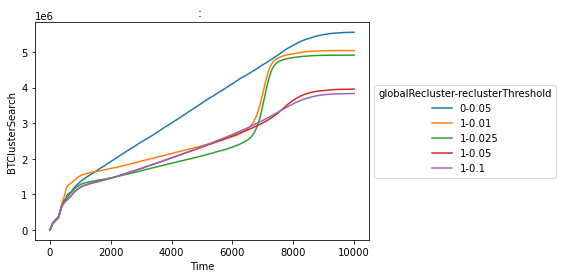

In [106]:
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

In [107]:
BT = compareOverTime('Bluetooth', [2,4], {0:0})

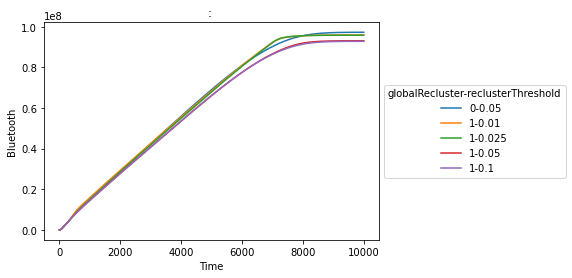

In [108]:
generateOverTimeGraphs(BT, separationLevel=0)

In [10]:
CS = compareOverTime('Cluster searches', [2,4], {0:0})

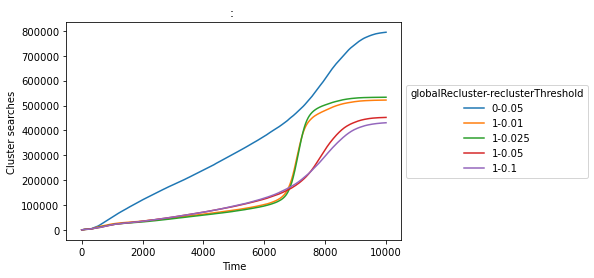

In [11]:
generateOverTimeGraphs(CS, separationLevel=0)

In [12]:
CSSolos = compareOverTime('CS Solos', [2,4], {0:0})

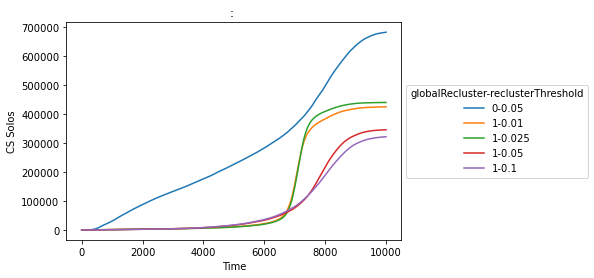

In [13]:
generateOverTimeGraphs(CSSolos, separationLevel=0)

In [16]:
CSJoins = compareOverTime('CS Joins', [2,4], {0:0})

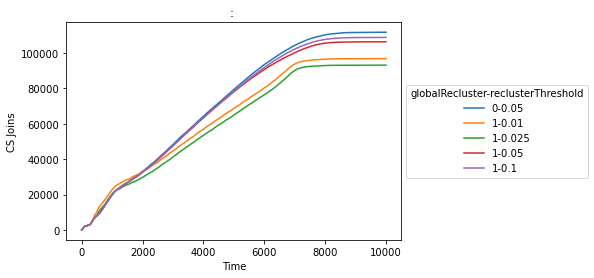

In [17]:
generateOverTimeGraphs(CSJoins, separationLevel=0)

In [18]:
above = compareOverTime('Clusters above thresh', [2,4], {0:0})

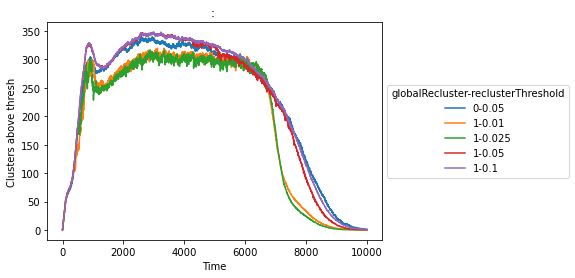

In [19]:
generateOverTimeGraphs(above, separationLevel=0)

In [20]:
below = compareOverTime('Clusters below thresh', [2,4], {0:0})

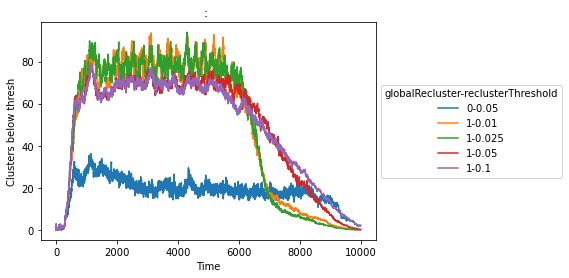

In [21]:
generateOverTimeGraphs(below, separationLevel=0)